# **Network analysis**

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import os

### **Step 0 - Data loading, normalization, degree calculation**

according to the paper, a normalization by columns is required (although apparently is not really super necessary)

In [2]:
data = pd.read_csv('data/io_tables/NOR2017ttl.csv', index_col=0)

In [34]:
n = 45
data = data.iloc[:n, :n] 
data.index = data.index.str.replace("TTL_", "", regex=False)
data

,A01_02,A03,B05_06,B07_08,B09,C10T12,C13T15,C16,C17_18,C19,...,K,L,M,N,O,P,Q,R,S,T
A01_02,323.5,6.8,4.2,0.7,2.7,3223.5,15.8,308.8,68.1,2.4,...,6.2,7.3,24.3,31.4,77.3,12.5,52.1,7.2,5.4,0
A03,3.7,1170.4,2.1,0.4,0.3,3329.8,0.4,1.3,0.3,0.1,...,2.5,0.6,4.0,2.7,6.1,5.0,40.8,1.3,0.2,0
B05_06,54.9,64.2,328.1,62.8,243.3,49.4,1.2,7.4,7.6,2985.6,...,8.5,97.7,73.1,116.5,68.5,22.1,70.0,30.6,13.0,0
B07_08,7.7,5.3,42.2,21.5,189.1,17.0,0.4,7.0,3.9,1.9,...,0.7,5.7,4.8,5.8,16.6,0.8,7.0,8.9,0.6,0
B09,3.1,33.3,4738.4,148.5,3076.7,11.5,0.1,0.6,6.1,1755.1,...,0.1,15.1,19.9,3.9,11.0,0.7,4.4,0.9,0.6,0
C10T12,896.0,2115.6,18.0,4.5,9.8,7155.0,12.0,13.7,4.0,2.4,...,22.5,7.7,37.2,29.5,90.0,49.4,384.9,15.2,1.8,0
C13T15,6.6,34.5,26.9,5.1,11.7,30.4,167.0,9.3,4.5,6.4,...,2.4,15.9,52.8,33.7,41.2,19.9,192.1,147.4,58.4,0
C16,3.8,7.8,8.9,2.1,7.2,15.7,0.8,632.3,40.6,1.1,...,3.1,526.0,17.7,12.0,6.0,6.8,18.9,40.8,15.4,0
C17_18,14.7,23.5,9.0,3.0,9.5,133.9,2.1,13.8,365.9,16.2,...,30.8,53.0,272.1,102.3,81.2,38.2,52.0,53.1,35.7,0
C19,112.0,110.4,118.3,87.8,275.0,85.8,4.3,13.8,10.3,199.0,...,9.3,177.0,67.3,70.2,131.9,42.2,130.3,43.7,22.4,0


calculation of in-degrees:

In [35]:
in_degree = data.sum(axis=0)
in_degree

A01_02     2880.7
A03        6049.6
B05_06     9616.7
B07_08     1038.6
B09        7752.1
C10T12    20898.4
C13T15      618.9
C16        2356.8
C17_18     1896.0
C19        6970.1
C20        4000.1
C21         715.0
C22         934.1
C23        2719.9
C24        7605.0
C25        2935.2
C26        1559.7
C27        1818.0
C28        3568.4
C29         617.4
C30        4405.9
C31T33     3747.9
D          1953.6
E          3675.0
F         43072.5
G         22583.2
H49        5892.3
H50       11966.5
H51        3542.8
H52        6666.5
H53         839.1
I          5562.3
J58T60     4119.9
J61        4546.7
J62_63     5649.8
K          8276.1
L         14843.1
M         12843.0
N          9049.3
O         15928.4
P          3999.5
Q          9926.4
R          3325.5
S          2683.4
T             0.0
dtype: float64

normalization and calculation of out-degrees (these second ones both first and second order)

In [59]:
# Step 1: Normalize each column (sector) by its total input requirement
W = data.div(data.sum(axis=0), axis=1).fillna(0) #0,1

In [70]:
# OR, no normalization at all:
W = data

In [71]:
# Step 2: Compute first-order degrees
# First-order degree of sector j: sum of W_ij over i (i.e., sum of row j in W)
first_order_degrees = W.sum(axis=1)


# Step 3: Compute second-order degrees
# Second-order degree of sector j: sum over i of W_ij * degree_i
second_order_degrees = W.mul(first_order_degrees, axis=0).sum(axis=0)

# Output results
first_order_degrees.name = 'First-Order Degree'
second_order_degrees.name = 'Second-Order Degree'
in_degree.name = 'In-Degree'

# Combine into a single DataFrame
degrees = pd.concat([first_order_degrees, second_order_degrees, in_degree], axis=1)
degrees

,First-Order Degree,Second-Order Degree,In-Degree
A01_02,4606.8,4.171150e+07,2880.7
A03,4728.1,7.822018e+07,6049.6
B05_06,7748.9,1.127857e+08,9616.7
B07_08,1325.6,1.210429e+07,1038.6
B09,10989.9,9.734916e+07,7752.1
C10T12,12825.8,2.645258e+08,20898.4
C13T15,1561.7,9.346924e+06,618.9
C16,4145.9,2.311787e+07,2356.8
C17_18,2516.0,1.708801e+07,1896.0
C19,5946.4,6.942328e+07,6970.1


### **Step 1 - in-degrees visualization and analysis**

In [72]:
def plot_in_degree_density(in_degrees, mean, std):
    plt.figure(figsize=(6, 4))
    ax = sns.kdeplot(in_degrees, fill=True, color='steelblue', linewidth=1)

    ax.axvline(mean-std, color='red', linestyle='--')
    ax.axvline(mean+std, color='red', linestyle='--')
    ax.axvline(mean, color='black', linestyle='-')

    plt.title('Empirical Density of Weighted In-Degrees')
    plt.xlabel('Weighted In-Degree')
    plt.ylabel('Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

========================== in-degree statistics ==========================
mean degree value = 6569.986666666668
std degrees = 7506.102227790696
pertentage of degrees within one std away from the mean: 88.88888888888889


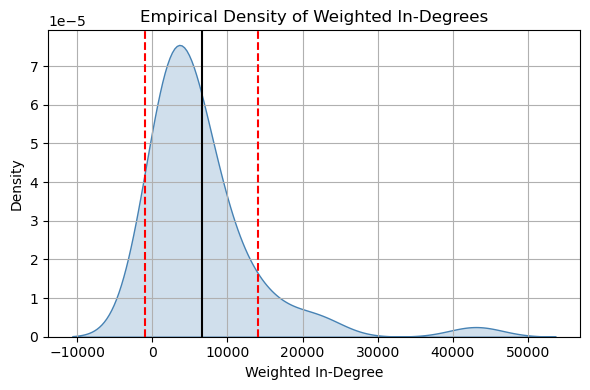

In [73]:
indegree_mean = np.mean(degrees['In-Degree'])
indegree_std = np.std(degrees['In-Degree'])

within_1_std = np.sum((degrees['In-Degree']>=indegree_mean-indegree_std)&(degrees['In-Degree']<=indegree_mean+indegree_std))
percentage_withing_1_std = (within_1_std/len(degrees['In-Degree']))*100

print('========================== in-degree statistics ==========================')
print(f'mean degree value = {indegree_mean}')
print(f'std degrees = {indegree_std}')
print(f'pertentage of degrees within one std away from the mean: {percentage_withing_1_std}')

print('==========================================================================')
plot_in_degree_density(degrees['In-Degree'], indegree_mean, indegree_std)

### **Step 2 - out-degrees (first and second order) visualization and analysis**

In [74]:
def plot_output_degrees_density(first_order_degrees, second_order_degrees):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

    # First-order degree plot
    sns.kdeplot(first_order_degrees, fill=True, color='orangered', linewidth=0.5, ax=axes[0]) #darkorange
    axes[0].set_title('First-Order Output Degrees')
    axes[0].set_xlabel('Degree Value')
    axes[0].set_ylabel('Density')
    axes[0].grid(True, which="both", ls="--", linewidth=0.4)

    # Second-order degree plot
    sns.kdeplot(second_order_degrees, fill=True, color='royalblue', linewidth=0.5, ax=axes[1]) #forsetgreen
    axes[1].set_title('Second-Order Output Degrees')
    axes[1].set_xlabel('Degree Value')
    axes[1].grid(True, which="both", ls="--", linewidth=0.2)

    plt.tight_layout()
    plt.show()

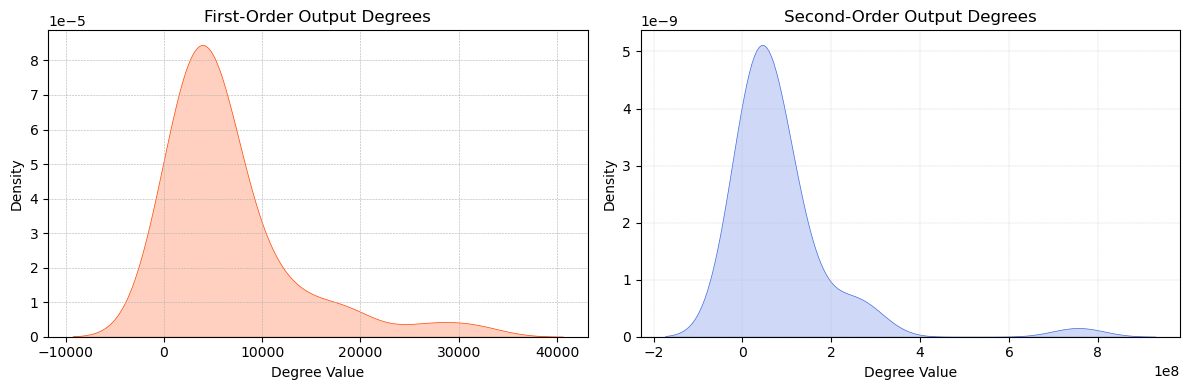

In [75]:
plot_output_degrees_density(degrees['First-Order Degree'], degrees['Second-Order Degree'])

In [76]:
# check which sectors are in the tails, i.e top sectors regarding the degree values
degrees['First-Order Degree'].sort_values(ascending=False).head(5)

G    31320.1
F    26496.6
K    19177.7
M    18271.8
N    16118.1
Name: First-Order Degree, dtype: float64

In [77]:
degrees['Second-Order Degree'].sort_values(ascending=False).head(5)

F         7.557185e+08
G         2.763753e+08
C10T12    2.645258e+08
L         2.516299e+08
O         2.467524e+08
Name: Second-Order Degree, dtype: float64

### **Step 3 - ECCDF for output degrees**

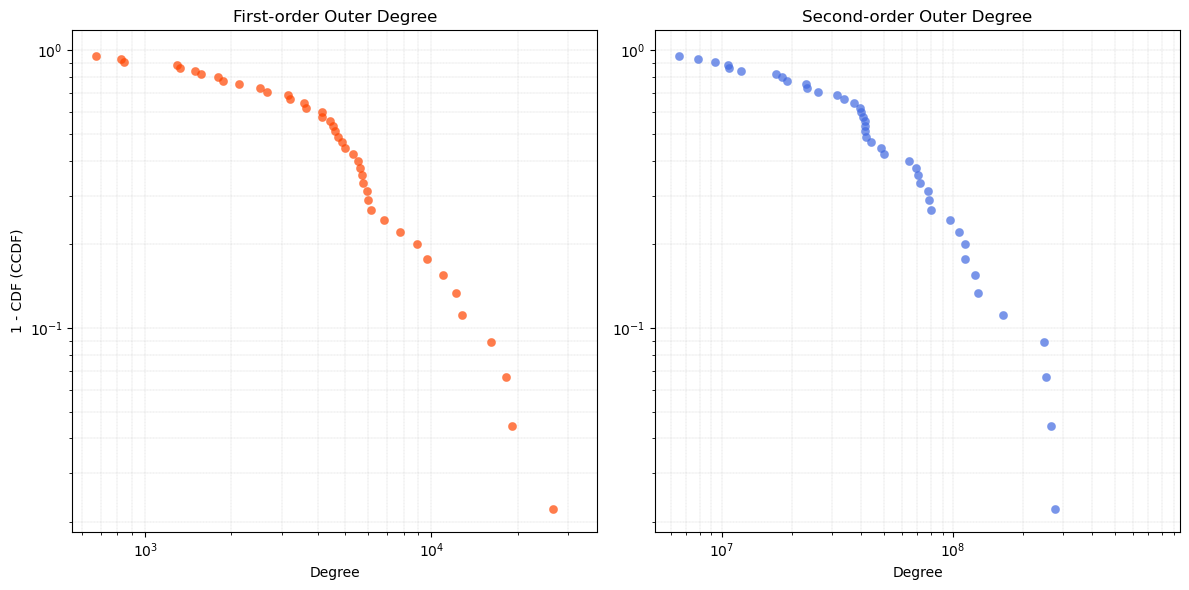

In [78]:
def compute_ccdf_direct(data):
    # Unique sorted values (ascending)
    values = np.sort(np.unique(data))
    n = len(data)

    # For each unique value, count how many data points are greater than it
    ccdf_y = np.array([np.sum(data > v) / n for v in values])

    return values, ccdf_y

# Compute CCDFs
x1, y1 = compute_ccdf_direct(degrees['First-Order Degree'])
x2, y2 = compute_ccdf_direct(degrees['Second-Order Degree'])

# Create two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First-order outer degree
axs[0].loglog(x1, y1, marker='o', linestyle='none', alpha=0.7, color='orangered', mew=0.2)
axs[0].set_title('First-order Outer Degree')
axs[0].set_xlabel('Degree')
axs[0].set_ylabel('1 - CDF (CCDF)')
axs[0].grid(True, which="both", ls="--", linewidth=0.2)

# Second-order outer degree
axs[1].loglog(x2, y2, marker='o', linestyle='none', alpha=0.7, color='royalblue', mew=0.2)
axs[1].set_title('Second-order Outer Degree')
axs[1].set_xlabel('Degree')
#axs[1].set_ylabel('1 - CDF (CCDF)')
axs[1].grid(True, which="both", ls="--", linewidth=0.2)

plt.tight_layout()
plt.show()

### **Step 4 - power law parameters estimation**

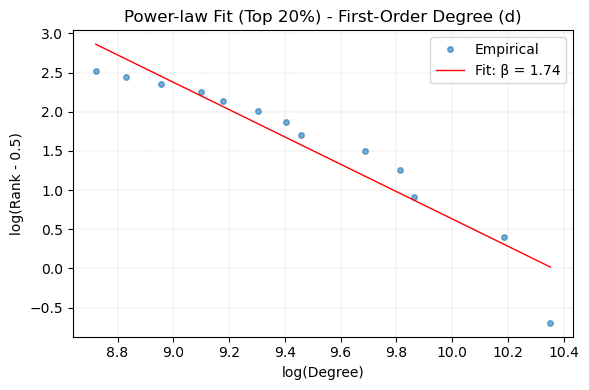

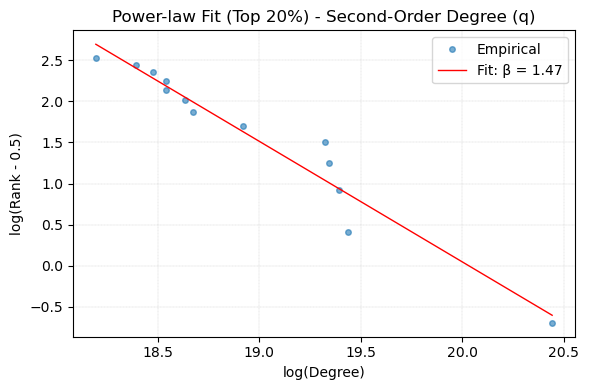

Estimated β (first-order degree): 1.745, R² = 0.906
Estimated ζ (second-order degree): 1.466, R² = 0.946


In [79]:
import statsmodels.api as sm

# Function to estimate power-law using Gabaix–Ibragimov correction
def estimate_power_law_gabaix(values, label=''):
    # Drop zeros and sort descending
    values = values[values > 0].sort_values(ascending=False)
    n = len(values)
    ranks = np.arange(1, n + 1)

    # Gabaix–Ibragimov correction: use rank - 0.5
    x = np.log(values.values)
    y = np.log(ranks - 0.5)

    # Run OLS: y = α - β x
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    beta = -model.params[1]
    
    # Plot log-log CCDF
    plt.figure(figsize=(6, 4))
    plt.plot(x, y, 'o', markersize=4, alpha=0.6, label='Empirical')
    plt.plot(x, model.predict(X), 'r-', label=f'Fit: β = {beta:.2f}', linewidth=1.)
    plt.title(f'Power-law Fit (Top 20%) - {label}')
    plt.xlabel('log(Degree)')
    plt.ylabel('log(Rank - 0.5)')
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.2)
    plt.tight_layout()
    plt.show()

    return beta, model.rsquared

# === 7. Take top 20% of d and q
top_d = degrees['First-Order Degree'].nlargest(int(0.30 * len(degrees)))
top_q = degrees['Second-Order Degree'].nlargest(int(0.30 * len(degrees)))

# === 8. Estimate and plot
beta_d, r2_d = estimate_power_law_gabaix(top_d, label='First-Order Degree (d)')
beta_q, r2_q = estimate_power_law_gabaix(top_q, label='Second-Order Degree (q)')

# === 9. Output results
print(f'Estimated β (first-order degree): {beta_d:.3f}, R² = {r2_d:.3f}')
print(f'Estimated ζ (second-order degree): {beta_q:.3f}, R² = {r2_q:.3f}')

other estimation, basic regression (less relaiable)

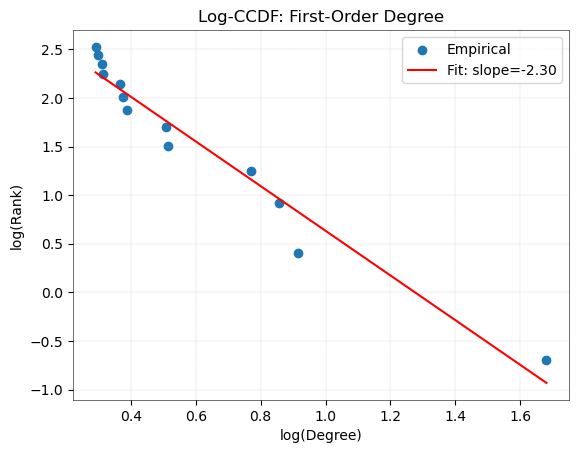

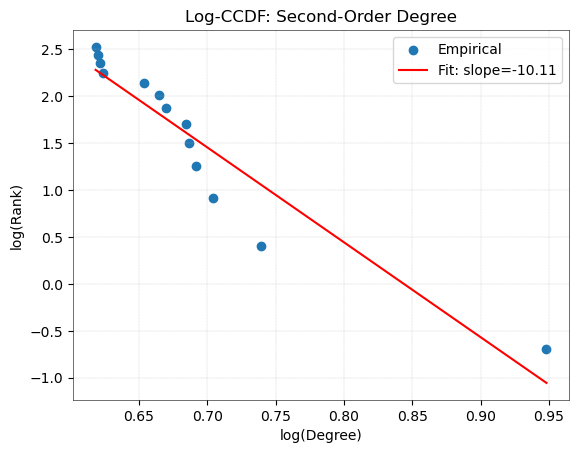

Estimated β (first-order degree exponent): 2.297, R² = 0.955
Estimated ζ (second-order degree exponent): 10.115, R² = 0.893


In [159]:
# === Plot CCDF (log-log) for top 20% of d and q ===
def plot_ccdf_loglog(values, title):
    sorted_vals = np.sort(values)[::-1]
    n_tail = int(len(sorted_vals))
    x = np.log(sorted_vals[:n_tail])
    y = np.log(np.arange(1, n_tail + 1) - 0.5)

    plt.figure()
    plt.scatter(x, y, label="Empirical")
    slope, intercept, rvalue, _, _ = linregress(x, y)
    plt.plot(x, slope * x + intercept, label=f"Fit: slope={slope:.2f}", color='red')
    plt.title(f"Log-CCDF: {title}")
    plt.xlabel("log(Degree)")
    plt.ylabel("log(Rank)")
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.2)
    plt.show()

    # Adjusted estimate per Gabaix and Ibragimov (2011)
    #beta_hat = 1 + (-slope)

    beta_hat = -slope
    return beta_hat, rvalue**2

# === Estimate power-law exponent for first- and second-order degrees ===
beta, rvalue1 = plot_ccdf_loglog(top_d, "First-Order Degree")
zeta, rvalue2 = plot_ccdf_loglog(top_q, "Second-Order Degree")

print(f"Estimated β (first-order degree exponent): {beta:.3f}, R² = {rvalue1:.3f}")
print(f"Estimated ζ (second-order degree exponent): {zeta:.3f}, R² = {rvalue2:.3f}")

### **Step 6 - final consideration about decay of aggregate volatility**

In [80]:
CV = (1/np.mean(degrees['First-Order Degree']))*np.var(degrees['First-Order Degree'], ddof=1)
CV

np.float64(6671.8047164018035)

In [81]:
print(f"so we have that aggregate volatility decays no faster than n^{(1+CV)/np.sqrt(n)}")

so we have that aggregate volatility decays no faster than n^994.7229964303758


***
## **Graph visualization**
This code creates an output to be open in gephi for the graph visualization. We save
* only edges with weights (i.e. entries of the IO table) greater than a predefined `threshold`
* node weights: outer degrees
* removed self-loops (for the sake of visualization)

In [11]:
# inport IO table
data = pd.read_csv('data/io_tables/CHN2018ttl.csv', index_col=0)

# format data
n = 45
intermediate_block = data.iloc[:n, :n] 
intermediate_block.index = intermediate_block.index.str.replace("TTL_", "", regex=False)
np.fill_diagonal(intermediate_block.values, 0) # this is for removing self-loops

In [12]:
G = nx.DiGraph()
threshold = 1.5  # threshold for edge weight
for i in intermediate_block.index:
    total_weight = intermediate_block.loc[i].sum()  # Outgoing weight from node i
    G.add_node(i, weight=total_weight)  # Set node weight to its outer degree
    for j in intermediate_block.columns:
        weight = intermediate_block.loc[i, j]
        if weight > threshold:  # w_ij > threshold
            G.add_edge(i, j, weight=weight)  # Edge from i to j


In [13]:
# the final graph G is exported for gephi
nx.write_gexf(G, 'outputs/CHN2018ttl.gexf')

***
## **Centrality measures**
**NOTE:** Better to execute these "by hand" here because some countries are missing in the Carbon tax database 

In [84]:
countries = {
    'SWE': 'Sweden',
    'POL': 'Poland',
    'ITA': 'Italy',
    'FRA': 'France',
    'FIN': 'Finland',
    'NOR': 'Norway',
    'CHE': 'Switzerland',
    'PRT': 'Portugal',
    'EST': 'Estonia',
    'LVA': 'Latvia',
    'CHN': 'China',
    'NZL': 'New Zealand',
    'DEU': 'Germany',
    'IND': 'India'
}

In [160]:
country = 'Switzerland'
country_code = 'CHE'

sectors = [
    "D",          # Electricity, gas, steam and air conditioning supply
    "C19",        # Coke and refined petroleum products
    "C24",        # Basic metals
    "C23",        # Other non-metallic mineral products
    "B05_06",     # Mining and quarrying, energy producing products
    "C20",        # Chemical and chemical products
    "H49",        # Land transport and transport via pipelines
    "F",          # Construction
    "B07_08",     # Mining and quarrying, non-energy producing products
    
]

output_dir = "outputs/"+country
#os.makedirs(output_dir, exist_ok=True)
n = 45
linewidth = 0.4
cmap = plt.cm.managua 
def save_plot(name):
    plt.savefig(os.path.join(output_dir, f"{name}.pdf"))
    plt.close()

In [174]:
carbon_data = pd.read_csv('tax_data.csv')
carbon_data.fillna(0.0, inplace=True)
carbon_data = carbon_data[carbon_data['year'].isin(range(2000, 2020))]
carbon_data = carbon_data[carbon_data['jurisdiction']==country]
carbon_data

,jurisdiction,year,mean_tax
283,Switzerland,2000,0.00
284,Switzerland,2001,0.00
285,Switzerland,2002,0.00
286,Switzerland,2003,0.00
287,Switzerland,2004,0.00
288,Switzerland,2005,0.00
289,Switzerland,2006,0.00
290,Switzerland,2007,0.00
291,Switzerland,2008,21.00
292,Switzerland,2009,20.76


cantralities calculation:

In [175]:
centralities_per_year = {}
for year in range(2000, 2020):
    data = pd.read_csv(f'data/io_tables/{country_code}{year}ttl.csv', index_col=0)
    data = data.iloc[:n, :n] 
    data.index = data.index.str.replace("TTL_", "", regex=False)


    G = nx.DiGraph()
    for i in data.index:
        #total_weight = data.loc[i].sum()  # Outgoing weight from node i
        G.add_node(i)  # Set node weight to its outer degree
        for j in data.columns:
            weight = data.loc[i, j]
            G.add_edge(i, j, weight=weight)  # Edge from i to j

    # Calculate centrality measures
    in_degrees = dict(G.in_degree(weight="weight"))
    in_degrees = pd.DataFrame(index=in_degrees.keys(), columns=['In-Degree'], data=in_degrees.values())
    out_degrees = dict(G.out_degree(weight="weight"))
    out_degrees = pd.DataFrame(index=out_degrees.keys(), columns=['First-Order Degree'], data=out_degrees.values())
    betweenness = nx.betweenness_centrality(G, weight='weight', normalized=True)
    betweenness = pd.DataFrame(index=betweenness.keys(), columns=['Betweenness centrality'], data=betweenness.values())
    eigenvector = nx.eigenvector_centrality(G, weight='weight', max_iter=1000)
    eigenvector = pd.DataFrame(index=eigenvector.keys(), columns=['Eigenvector centrality'], data=eigenvector.values())

    # concat
    centralities = pd.concat([in_degrees, out_degrees, betweenness, eigenvector], axis=1)
    centralities_per_year[year] = centralities

In [176]:
centralities_per_year[2012]

,In-Degree,First-Order Degree,Betweenness centrality,Eigenvector centrality
A01_02,7324.3,11319.4,3.058301e-05,3.060066e-02
A03,15.4,22.5,2.567720e+11,4.379547e-05
B05_06,1077.1,4671.6,5.285413e-04,6.505424e-03
B07_08,169.7,1933.7,5.285414e-04,8.332385e-04
B09,8.8,43.5,2.157387e+10,3.516801e-05
C10T12,27671.6,17716.1,0.000000e+00,1.093253e-01
C13T15,2315.9,2617.2,9.815777e-04,1.006846e-02
C16,5460.7,8693.6,5.285432e-04,1.572471e-02
C17_18,4725.4,7818.8,5.285452e-04,1.703297e-02
C19,4356.7,8744.7,5.285492e-04,1.713932e-02


single centrality plot:

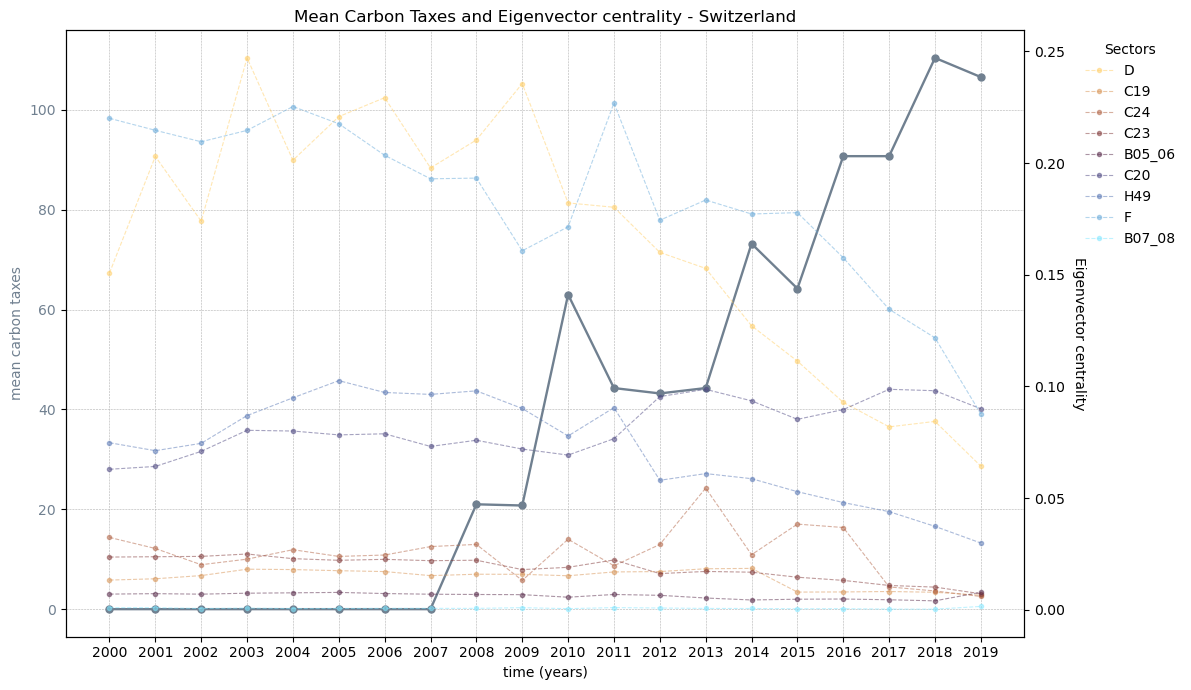

In [170]:
colors = [cmap(i / (len(sectors) - 1)) for i in range(len(sectors))]
fig, ax1= plt.subplots(figsize=(12, 7))

# NOTE: change this to plot other centralities
centrality = 'Eigenvector centrality'
centrality_values = [degrees[centrality] for degrees in centralities_per_year.values()]
years = list(centralities_per_year.keys())

# Plot mean carbon taxes
color = 'slategrey'
ax1.set_xlabel('time (years)')
ax1.set_xticks(years)
ax1.set_ylabel('mean carbon taxes', color=color)
ax1.plot(years, carbon_data['mean_tax'], marker='o', linestyle='-', markersize=5, color=color, linewidth=1.7, alpha=1.)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis - plot centrality for each sector
ax2 = ax1.twinx()
color = 'black'
ax2.set_ylabel(f'{centrality}', color=color, rotation=270, labelpad=15)
for i, sector in enumerate(sectors):
    sector_degrees = [aus[sector] for aus in centrality_values]
    ax2.plot(years, sector_degrees, marker='o', linestyle='dashed', color=colors[i], markersize=3, linewidth=0.8, alpha=0.5, label=sector)
ax2.tick_params(axis='y', labelcolor=color)

plt.legend(title='Sectors', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.title(f'Mean Carbon Taxes and {centrality} - {country}')
ax1.grid(True, which="both", axis='both', ls="--", linewidth=linewidth)
plt.tight_layout()
plt.show()

panel multiple centralities:

In [74]:
economic_sectors = {
    "A01_02": "Agriculture, hunting, forestry",
    "A03": "Fishing and aquaculture",
    "B05_06": "Mining and quarrying, energy producing products",
    "B07_08": "Mining and quarrying, non-energy producing products",
    "B09": "Mining support service activities",
    "C10T12": "Food products, beverages and tobacco",
    "C13T15": "Textiles, textile products, leather and footwear",
    "C16": "Wood and products of wood and cork",
    "C17_18": "Paper products and printing",
    "C19": "Coke and refined petroleum products",
    "C20": "Chemical and chemical products",
    "C21": "Pharmaceuticals, medicinal chemical and botanical products",
    "C22": "Rubber and plastics products",
    "C23": "Other non-metallic mineral products",
    "C24": "Basic metals",
    "C25": "Fabricated metal products",
    "C26": "Computer, electronic and optical equipment",
    "C27": "Electrical equipment",
    "C28": "Machinery and equipment, nec",
    "C29": "Motor vehicles, trailers and semi-trailers",
    "C30": "Other transport equipment",
    "C31T33": "Manufacturing nec; repair and installation of machinery and equipment",
    "D": "Electricity, gas, steam and air conditioning supply",
    "E": "Water supply; sewerage, waste management and remediation activities",
    "F": "Construction",
    "G": "Wholesale and retail trade; repair of motor vehicles",
    "H49": "Land transport and transport via pipelines",
    "H50": "Water transport",
    "H51": "Air transport",
    "H52": "Warehousing and support activities for transportation",
    "H53": "Postal and courier activities",
    "I": "Accommodation and food service activities",
    "J58T60": "Publishing, audiovisual and broadcasting activities",
    "J61": "Telecommunications",
    "J62_63": "IT and other information services",
    "K": "Financial and insurance activities",
    "L": "Real estate activities",
    "M": "Professional, scientific and technical activities",
    "N": "Administrative and support services",
    "O": "Public administration and defence; compulsory social security",
    "P": "Education",
    "Q": "Human health and social work activities",
    "R": "Arts, entertainment and recreation",
    "S": "Other service activities",
    "T": "Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use",
    "HFCE": "Final consumption expenditure of households",
    "NPISH": "Final consumption expenditure of non-profit institutions serving households",
    "GGFC": "Final consumption expenditure of general government",
    "GFCF": "Gross Fixed Capital Formation",
    "INVNT": "Changes in inventories",
    "DPABR": "Direct purchases abroad by residents (imports)",
    "CONS_NONRES": "Direct purchases by non-residents (exports)",
    "EXPO": "Exports (cross border)",
    "IMPO": "Imports (cross border)"
}

In [177]:
from scipy import stats

def spearmann_correlation_permutate(x,y):
    ''' this calculates the Spearman correlation between x and y
    while performing a permutation test instead of relying on the
    asymptotic p-value (as is not reliable for small datasets).
    '''
    def statistic(x): # permute only `x`
        return stats.spearmanr(x, y).statistic

    res_exact = stats.permutation_test((x,), statistic, n_resamples=1000, permutation_type='pairings')
    return res_exact.statistic, res_exact.pvalue 

/var/folders/_n/mb_3v23d55q44hb8sbt6l5xh0000gp/T/ipykernel_33282/202843619.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return stats.spearmanr(x, y).statistic
/var/folders/_n/mb_3v23d55q44hb8sbt6l5xh0000gp/T/ipykernel_33282/202843619.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return stats.spearmanr(x, y).statistic


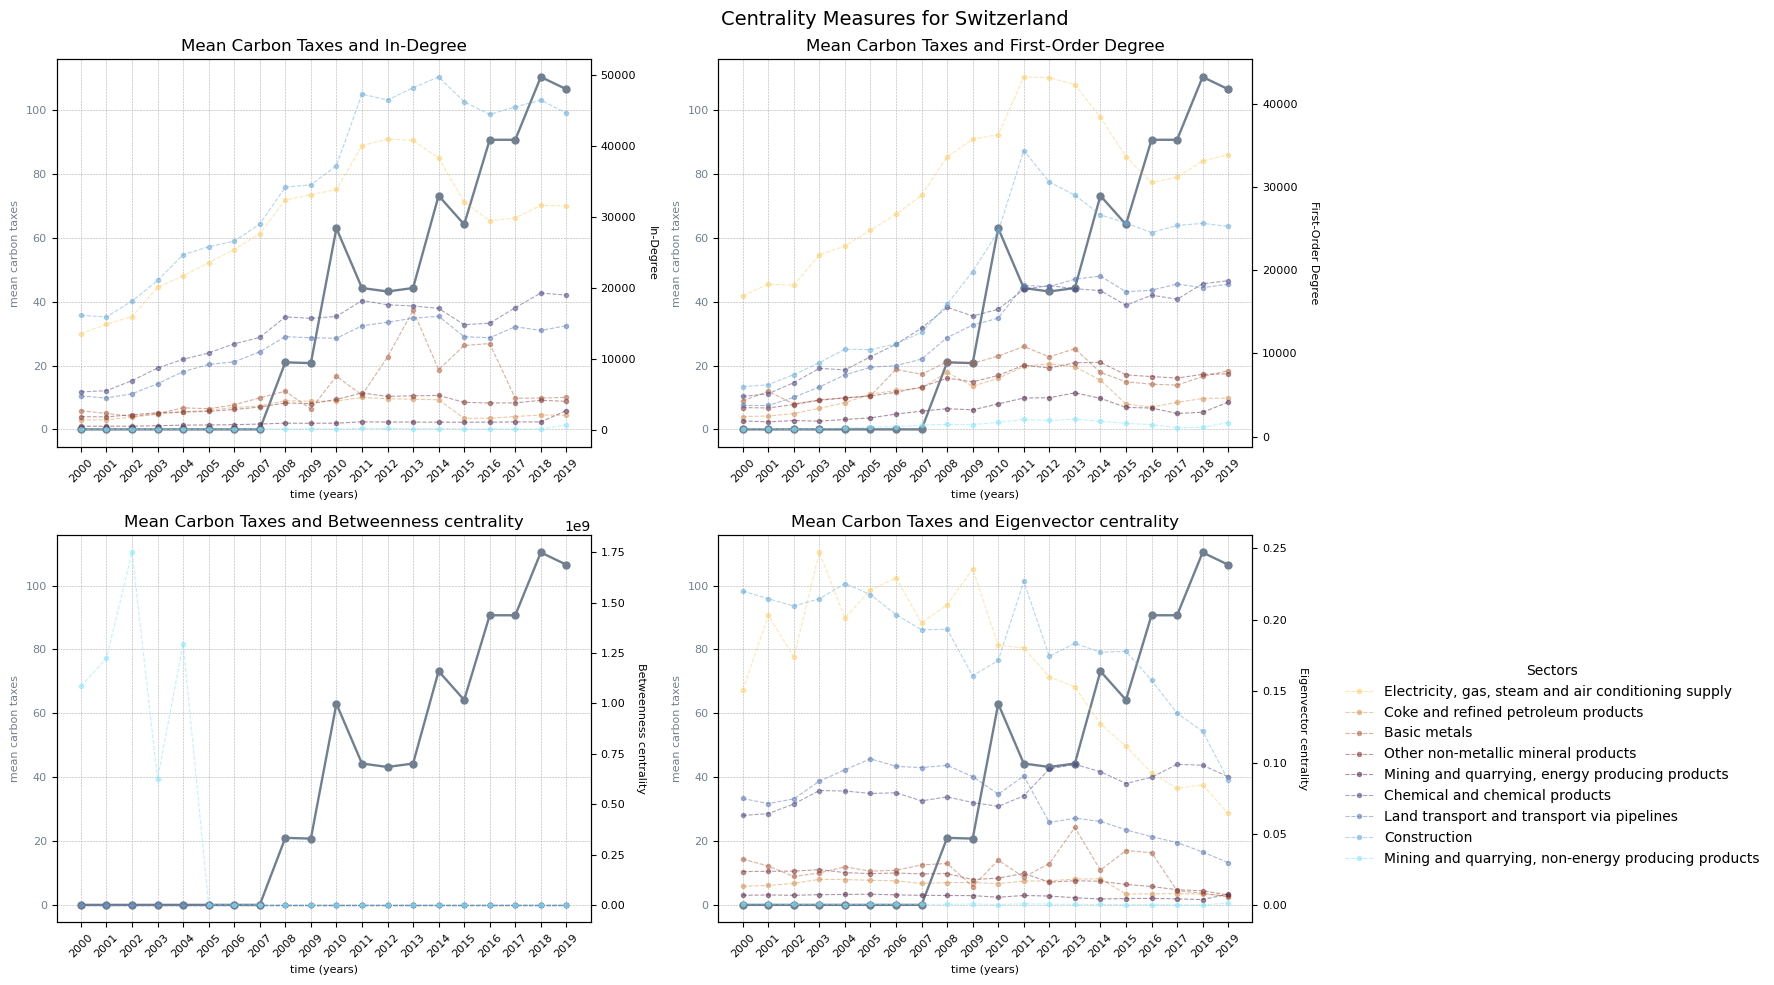

In [178]:
colors = [cmap(i / (len(sectors) - 1)) for i in range(len(sectors))]
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs_2 = [[None for _ in range(2)] for _ in range(2)]
new_size = 8

corr = pd.DataFrame()
for k, centrality in enumerate(centralities.columns):

    centrality_values = [degrees[centrality] for degrees in centralities_per_year.values()]
    years = list(centralities_per_year.keys())

    corr_aus = pd.DataFrame(columns=['Sector', centrality, centrality+' pvalue'])

    # Plot mean carbon taxes
    color = 'slategrey'
    axs[k//2][k%2].set_xlabel('time (years)')
    axs[k//2][k%2].set_xticks(years)
    axs[k//2][k%2].set_ylabel('mean carbon taxes', color=color)
    axs[k//2][k%2].plot(years, carbon_data['mean_tax'], marker='o', linestyle='-', markersize=5, color=color, linewidth=1.7, alpha=1.)
    axs[k//2][k%2].tick_params(axis='y', labelcolor=color)
    axs[k//2][k%2].tick_params(axis='x', labelrotation=45)

    # Create a second y-axis that shares the same x-axis - plot centrality for each sector
    axs_2[k//2][k%2] = axs[k//2][k%2].twinx()
    color = 'black'
    axs_2[k//2][k%2].set_ylabel(f'{centrality}', color=color, rotation=270, labelpad=15)
    for i, sector in enumerate(sectors):
        sector_degrees = [aus[sector] for aus in centrality_values]
        axs_2[k//2][k%2].plot(years, sector_degrees, marker='o', linestyle='dashed', color=colors[i], markersize=3, linewidth=0.8, alpha=0.5, label=economic_sectors[sector])

        # correlation by current centrality measure and carbon taxes
        aus = spearmann_correlation_permutate(sector_degrees, carbon_data['mean_tax'])
        corr_aus.loc[len(corr_aus)] = [sector, aus[0], aus[1]]

    if corr.empty:
        corr = corr_aus
    else:
        corr = corr.merge(corr_aus, on='Sector')

    axs_2[k//2][k%2].tick_params(axis='y', labelcolor=color)

    axs[k//2][k%2].set_title(f'Mean Carbon Taxes and {centrality}')
    axs[k//2][k%2].grid(True, which="both", axis='both', ls="--", linewidth=linewidth)

    # fonts
    axs[k//2][k%2].xaxis.label.set_fontsize(new_size)
    axs[k//2][k%2].yaxis.label.set_fontsize(new_size)
    axs_2[k//2][k%2].xaxis.label.set_fontsize(new_size)
    axs_2[k//2][k%2].yaxis.label.set_fontsize(new_size)
    # Set tick label font sizes
    for label in axs[k//2][k%2].get_xticklabels() + axs[k//2][k%2].get_yticklabels() + axs_2[k//2][k%2].get_xticklabels() + axs_2[k//2][k%2].get_yticklabels():
        label.set_fontsize(new_size)

fig.suptitle(f'Centrality Measures for {country}', fontsize=14)
plt.legend(title='Sectors', bbox_to_anchor=(1.15, 0.7), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()
#save_plot('centralities_vs_carbon_tax')

the following is the table containing the correlations between each centrality measure and the carbon. taxes values; note that some entry are missing because some centrality measure could result in being constantly 0 (typically betweenness centrality):

In [179]:
corr

,Sector,In-Degree,In-Degree pvalue,First-Order Degree,First-Order Degree pvalue,Betweenness centrality,Betweenness centrality pvalue,Eigenvector centrality,Eigenvector centrality pvalue
0,D,0.601735,0.007992,0.630500,0.001998,-0.421631,0.051948,-0.779767,0.001998
1,C19,0.067637,0.719281,0.254221,0.285714,0.711431,0.003996,-0.452467,0.049950
2,C24,0.656932,0.007992,0.404266,0.081918,-0.622194,0.005994,-0.129832,0.603397
3,C23,0.752557,0.001998,0.786764,0.001998,0.541891,0.015984,-0.883943,0.001998
4,B05_06,0.872282,0.001998,0.641384,0.001998,-0.552783,0.009990,-0.677146,0.001998
5,C20,0.820194,0.001998,0.856733,0.001998,NaN,0.001998,0.645271,0.001998
6,H49,0.771993,0.001998,0.838075,0.001998,-0.721731,0.001998,-0.755667,0.001998
7,F,0.789096,0.001998,0.754889,0.001998,NaN,0.001998,-0.786764,0.001998
8,B07_08,0.651490,0.001998,0.522436,0.015984,-0.627390,0.005994,-0.378611,0.103896


## **Enviromental FPT**

In [76]:
eamfp = pd.read_csv('data/env_TFP.csv', index_col=0)
eamfp = eamfp.loc[:,['REF_AREA', 'Reference area', 'Measure', 'Unit of measure', 'TIME_PERIOD', 'OBS_VALUE']]
eamfp


,REF_AREA,Reference area,Measure,Unit of measure,TIME_PERIOD,OBS_VALUE
STRUCTURE,,,,,,
DATAFLOW,EST,Estonia,Pollution-adjusted GDP growth,Percentage change,2000,9.814491
DATAFLOW,EST,Estonia,Pollution-adjusted GDP growth,Percentage change,2001,5.830348
DATAFLOW,EST,Estonia,Pollution-adjusted GDP growth,Percentage change,2002,7.114559
DATAFLOW,EST,Estonia,Pollution-adjusted GDP growth,Percentage change,2003,6.946080
DATAFLOW,EST,Estonia,Pollution-adjusted GDP growth,Percentage change,2004,6.545341
...,...,...,...,...,...,...
DATAFLOW,IND,India,Adjustment for CO2 abatement,Percentage change,2014,-0.676148
DATAFLOW,IND,India,Adjustment for CO2 abatement,Percentage change,2015,-0.328138
DATAFLOW,IND,India,Adjustment for CO2 abatement,Percentage change,2016,-0.210400


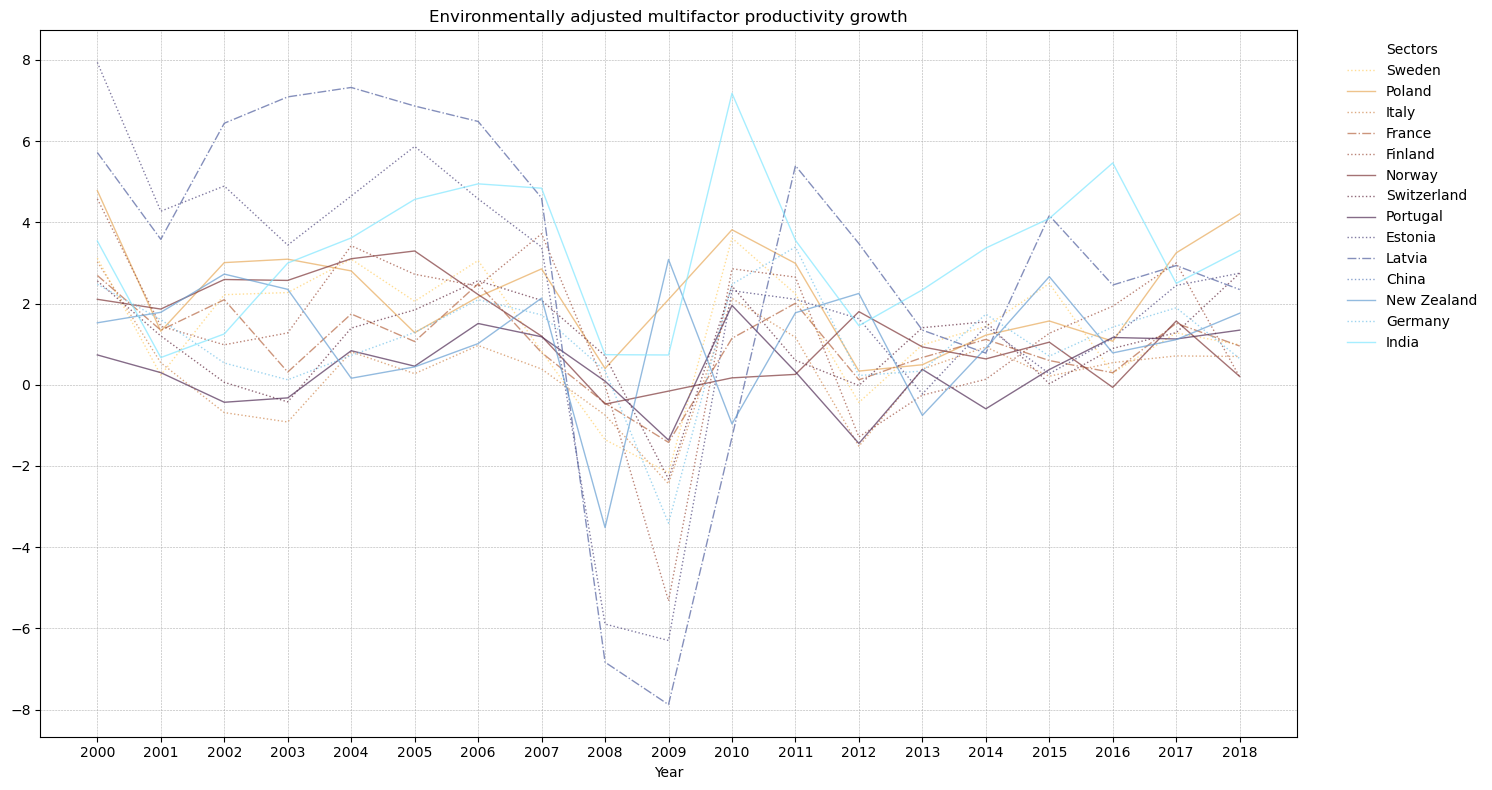

In [155]:
# plot just enviromentally adjusted MFP and GDP growth/pollution-adjucted
fig, ax2= plt.subplots(figsize=(15, 8))
colors = [cmap(i / (len(countries) - 1)) for i in range(len(countries))]

for i, country in enumerate(countries.values()):
    
    selected_data = eamfp[(eamfp['Reference area'] == country)]

    standard_GDP = selected_data[selected_data['Measure'] == 'GDP growth']
    corrected_GDP = selected_data[selected_data['Measure'] == 'Pollution-adjusted GDP growth']
    mfp = selected_data[selected_data['Measure'] == 'Environmentally adjusted multifactor productivity growth']

    #ax1.plot(standard_GDP['TIME_PERIOD'], standard_GDP['OBS_VALUE'], marker='o', linestyle='dotted', markersize=3, color=colors[i], linewidth=0.8, alpha=0.7, label=country)
    #ax1.plot(corrected_GDP['TIME_PERIOD'], standard_GDP['OBS_VALUE'], marker=' ', linestyle='solid', markersize=3, color=colors[i], linewidth=0.8, alpha=0.7)
    #ax1.set_yscale("log")
    if i%2==0:
        linestyle = 'dotted'
    elif i%3==0:
        linestyle = 'dashdot'
    else:
        linestyle = 'solid'
    ax2.plot(mfp['TIME_PERIOD'], mfp['OBS_VALUE'], marker='o', linestyle=linestyle, markersize=0, color=colors[i], linewidth=1., alpha=0.7, label=country)

#.set_title('GDP growth vs Pollution-adjusted GDP growth')
#ax1.set_xlabel('Year')
#ax1.set_xticks(list(standard_GDP['TIME_PERIOD']))
#ax1.grid(True, which="both", ls="--", linewidth=linewidth)
ax2.legend(title='Sectors', bbox_to_anchor=(1.03, 1.), loc='upper left', frameon=False)
ax2.set_title('Environmentally adjusted multifactor productivity growth')
ax2.set_xlabel('Year')
ax2.set_xticks(list(standard_GDP['TIME_PERIOD']))
ax2.grid(True, which="both", ls="--", linewidth=linewidth)

plt.tight_layout()
plt.show()